1. Consider the karate club graph in the network distribution used in Lab4
   
   G = nx.karate_club_graph()
   
   Try to implement the Baryentric heuristic to sort nodes in the arc diagram and use nxviz to display the arc diagram sorted according to the heuristic and with nodes colored according to the node degree
   
   Remember: the algorithm is not guaranteed to converge, so use a limited number of iterations

1. Load the spotify 30K songs dataset used in HW1. Consider the following tasks (and related target data)
   - Using Plotly, create a treemap, representing the hierarchy of the playlist_genres and subgenres, with box sizes mapped from the number of items, and color mapped from the average popularity. Use a non-default, perceptually uniform sequential colormap and set the color range mapped to the whole range of potential values of the average popularity (0-100). Visualize the same hierarchy tree as a node-link diagram with node size proportional to the number of items, the color proportional to the average popularity
   - Create a simple Dash app with the possibility of selecting the songs of different decades (1950-1960, 1961-1970,…) with a menu and the type of chart (treemap or sunburst) with another menu. The apps should show with the selected chart type the tree representation of the hierarchy: all->genres->subgenres

## Ex2: Consider the karate club graph

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from nxviz import ArcPlot

/Users/khoimai/Documents/vrn/data-viz/.venv/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.0 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.0, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
G = nx.karate_club_graph() 

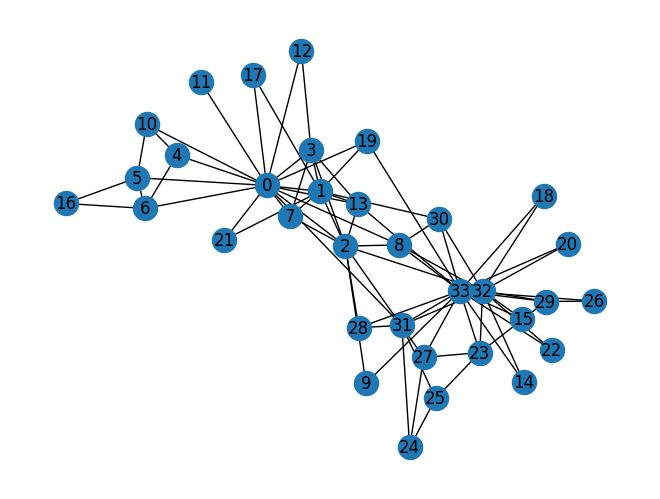

In [3]:
nx.draw(G, with_labels = True)

/Users/khoimai/Documents/vrn/data-viz/.venv/lib/python3.9/site-packages/nxviz/api.py:265: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


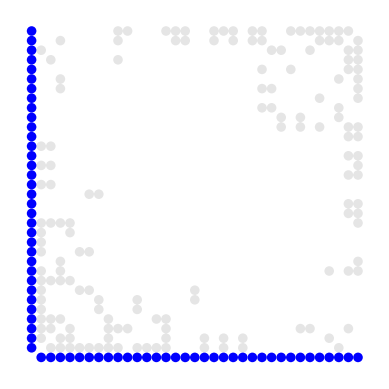

In [4]:
nv.MatrixPlot(G)

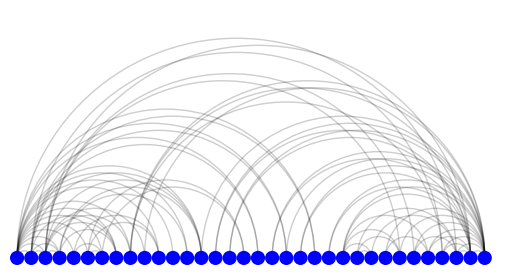

In [5]:
nv.ArcPlot(G)

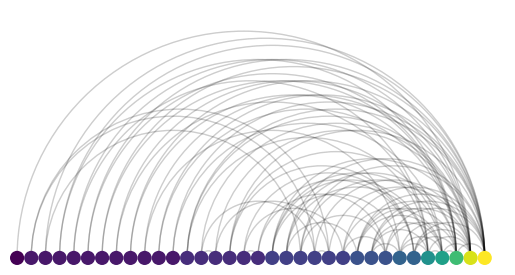

In [41]:
for n, d in G.nodes(data=True):
        G.nodes[n]['degree'] = nx.degree(G, n)

a = nv.ArcPlot(G,node_order='degree',node_color='degree')

### Implement the Baryentric heuristic to sort nodes in the arc diagram 

In [13]:
def barycentric_sorting(G, max_iterations=100):
    """Sort nodes using Barycentric heuristic."""
    positions = {n: i for i, n in enumerate(G.nodes())}

    for _ in range(max_iterations):
        new_positions = {}
        for node in G.nodes():
            neighbors = list(G.neighbors(node))
            if not neighbors:
                new_positions[node] = positions[node]
            else:
                barycenter = np.mean([positions[neighbor] for neighbor in neighbors])
                new_positions[node] = barycenter

        sorted_nodes = sorted(new_positions, key=new_positions.get)
        positions = {n: i for i, n in enumerate(sorted_nodes)}

    return sorted_nodes

In [32]:
sorted_nodes = barycentric_sorting(G)
sorted_nodes

[16,
 5,
 6,
 4,
 10,
 11,
 0,
 12,
 17,
 21,
 3,
 7,
 1,
 19,
 13,
 2,
 8,
 30,
 9,
 14,
 15,
 18,
 20,
 22,
 28,
 31,
 27,
 23,
 26,
 29,
 24,
 33,
 32,
 25]

### Use nxviz to display the arc diagram sorted according to the heuristic and with nodes colored according to the node degree

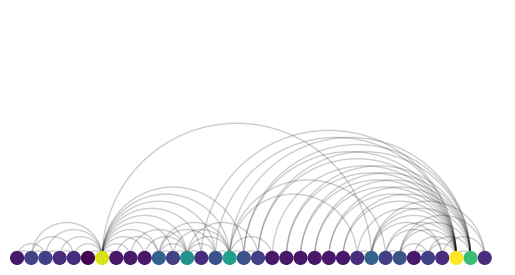

In [46]:
# Assign sorted order to a node attribute
for i, node in enumerate(sorted_nodes):
	G.nodes[node]['sorted_order'] = i

# Update the node order and node color in the ArcPlot
a = nv.ArcPlot(G, node_order='sorted_order', node_color='degree')

## Ex2: Load the spotify 30K songs dataset used in HW1

In [51]:
songs = pd.read_csv("data/spotify_songs.csv")

# Check row and column numbers

rows = songs.shape[0] 
cols = songs.shape[1]
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))


#print(songs.isnull().sum())
songs = songs.dropna() 

# Adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)

songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by='year', ascending=True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [ ]:
# Group by genre and subgenre to get the count and average popularity
genre_subgenre = songs.groupby(['playlist_genre', 'playlist_subgenre']).agg(
    count=('track_id', 'size'),
    avg_popularity=('track_popularity', 'mean')
).reset_index()

genre_subgenre

,playlist_genre,playlist_subgenre,count,avg_popularity
0,edm,big room,1206,32.282753
1,edm,electro house,1511,35.510258
2,edm,pop edm,1517,45.686223
3,edm,progressive electro house,1809,26.867883
4,latin,latin hip hop,1655,43.477341
5,latin,latin pop,1262,51.099842
6,latin,reggaeton,948,52.925105
7,latin,tropical,1288,43.327640
8,pop,dance pop,1298,52.079353
9,pop,electropop,1408,42.725142


### Create a treemap, representing the hierarchy of the playlist_genres and subgenres, with box sizes mapped from the number of items, and color mapped from the average popularity. Use a non-default, perceptually uniform sequential colormap and set the color range mapped to the whole range of potential values of the average popularity (0-100).

In [55]:
import plotly.express as px
import plotly.graph_objects as go



# Create the treemap
fig_treemap = px.treemap(
    genre_subgenre,
    path=['playlist_genre', 'playlist_subgenre'],
    values='count',
    color='avg_popularity',
    color_continuous_scale='Viridis',
    range_color=[0, 100],
    title='Treemap of Playlist Genres and Subgenres'
)
fig_treemap.show()

### Visualize the same hierarchy tree as a node-link diagram with node size proportional to the number of items, the color proportional to the average popularity

In [57]:
fig_node_link = go.Figure(
    data=[
        go.Scatter(
            x=edge_x,
            y=edge_y,
            mode='lines',
            line=dict(color='gray', width=1),
            hoverinfo='none'
        ),
        go.Scatter(
            x=node_x,
            y=node_y,
            mode='markers',
            marker=dict(
                size=node_size,
                color=node_color,
                colorscale='Viridis',
                colorbar=dict(
                    title='Average Popularity',
                    x=1.2,  # Moves the colorbar to the right
                ),
                cmin=0,
                cmax=100
            ),
            text=node_x,
            hoverinfo='text'
        )
    ]
)

# Update layout to ensure space for legends
fig_node_link.update_layout(
    title='Node-Link Diagram of Playlist Genres and Subgenres',
    margin=dict(r=150)  # Add margin on the right to avoid overlap
)

fig_node_link.show()

### Create a simple Dash app with the possibility of selecting the songs of different decades (1950-1960, 1961-1970,…) with a menu and the type of chart (treemap or sunburst) with another menu. The apps should show with the selected chart type the tree representation of the hierarchy: all->genres->subgenres